# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [120]:
import numpy as np
from scipy.linalg import svd
from scipy import linalg
import pandas as pd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [121]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [122]:
def svd_validation(A):
    M,N = A.shape
    U,s,Vh = linalg.svd(A)
    Sig = linalg.diagsvd(s,M,N)
    U, Vh = U, Vh
    Al=U.dot(Sig.dot(Vh))
    return np.allclose(A,Al)

In [123]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

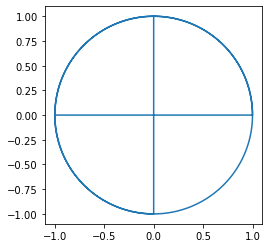

In [126]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [127]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


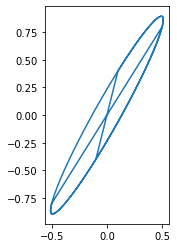

In [128]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [129]:
u, s, vh = linalg.svd(A)

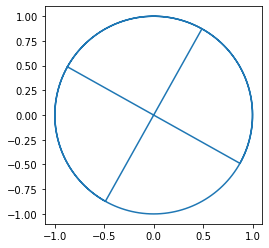

In [130]:
show_circle(u @ circle)

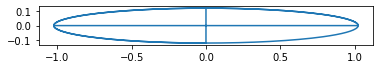

In [131]:
M,N = A.shape
Sig = linalg.diagsvd(s,M,N)
show_circle( Sig @ circle)

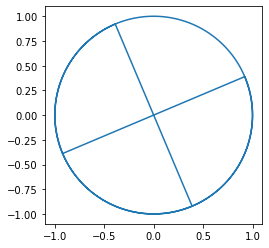

In [132]:
show_circle(vh @ circle)

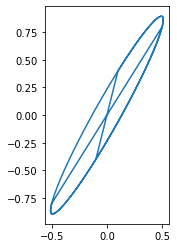

In [133]:
show_circle(u.dot(np.diag(s).dot(vh)) @ circle)

__Respuesta:__ Lo que hace la transformación es rotar, escalar y rotar la circunferencia unitaria. Al ser U y V unitarias solo rotan la circunferencia no la escalan.

__Respuesta:__  La relacion es que en lugar de hacer la transformación en un movimiento (matriz A), la descomponemos en tres movimientos (U, S y Vh). Al final La SVD puede verse como la descomposición de una transformación compleja (matriz A) en 3 transformaciones más simples una rotación (U), una escala(S) y otra rotación(Vh).

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [134]:
from pathlib import Path
from PIL import Image

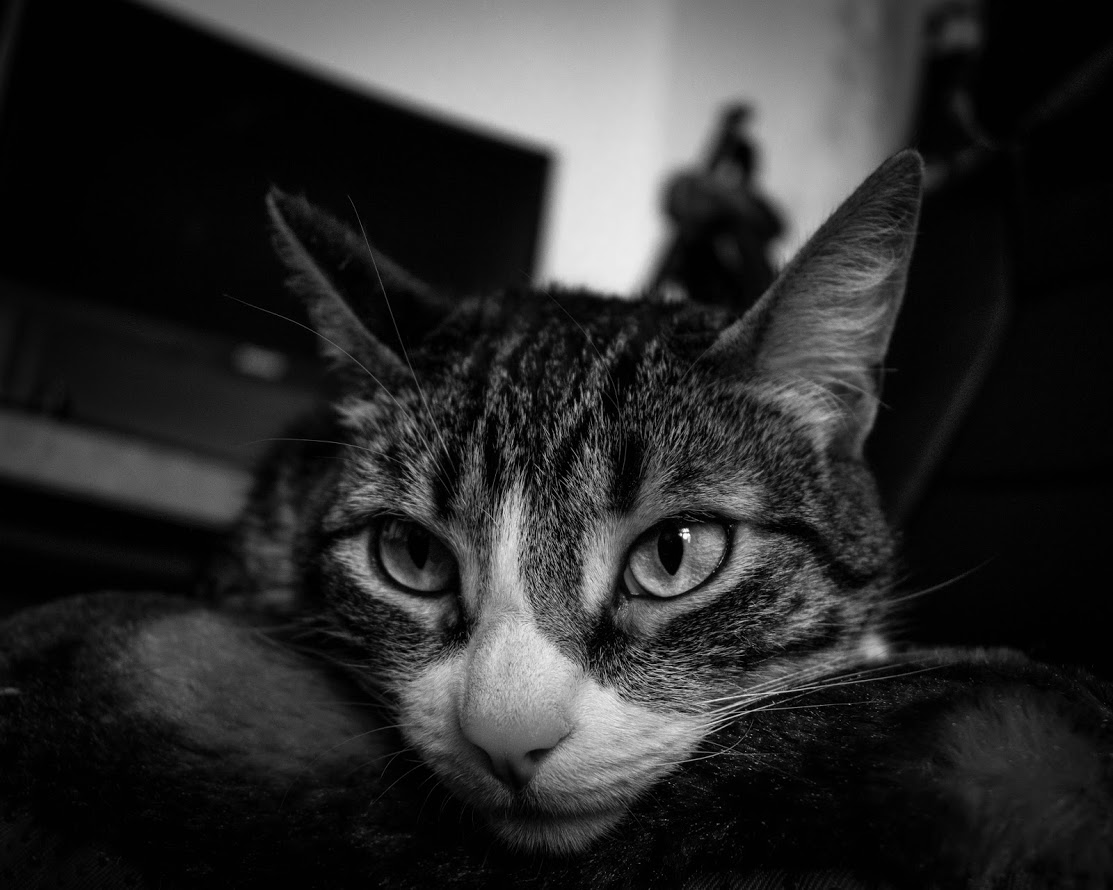

In [135]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [136]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [137]:
def low_rank_svd_approximation(A, l):
    u,s,vh = linalg.svd(A)
    u = u[:,:l]
    vh = vh[:l,:]
    s = s[:l]
    s = np.diag(s)
    Al = np.dot(np.dot(u,s),vh)
    error_fro=np.linalg.norm(A-Al, 'fro')
    print(f" el error de aproximación por la norma de Frobenius es {error_fro}.")    
    return Al
    

 el error de aproximación por la norma de Frobenius es 16040.9365234375.


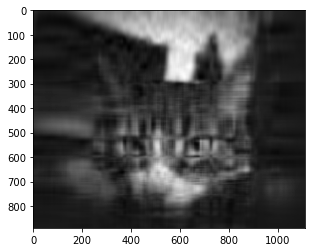

In [138]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

 el error de aproximación por la norma de Frobenius es 0.3589085042476654.


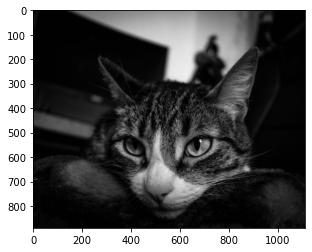

In [139]:
cat50 = low_rank_svd_approximation(cat_np, l=890)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [140]:
def low_rank_svd_tol_approximation(A, tol):
    M,N = A.shape
    rank =min(M,N)
    n=5  #incremento de rango,a menor incremento mayor aproximación a tolerancia (tol), pero toma mas tiempo
    for l in range(1,rank, n):                  
        u,s,vh = linalg.svd(A)
        u = u[:,:l]
        vh = vh[:l,:]
        s = s[:l]
        s = np.diag(s)
        Al_e = np.dot(np.dot(u,s),vh)
        tol_rel=np.linalg.norm(A-Al_e,'fro')/ np.linalg.norm(A,'fro')
        if tol_rel <= tol:
            print(f" ℓ(ε) o el mayor rango aproximado de A es {l} con una tolerancia relativa ε de {round(tol_rel, 4)}. El incremento de rango para el ciclo for es de {n} en {n}.")    
            break
    return Al_e

 ℓ(ε) o el mayor rango aproximado de A es 66 con una tolerancia relativa ε de 0.0978. El incremento de rango para el ciclo for es de 5 en 5.


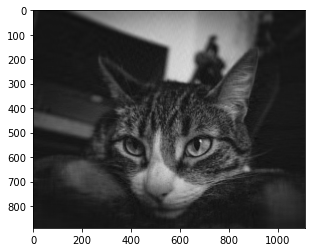

In [141]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

 ℓ(ε) o el mayor rango aproximado de A es 461 con una tolerancia relativa ε de 0.0097. El incremento de rango para el ciclo for es de 5 en 5.


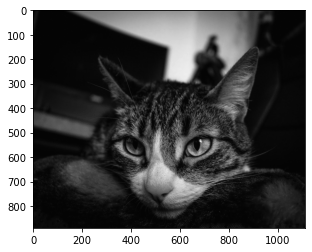

In [142]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

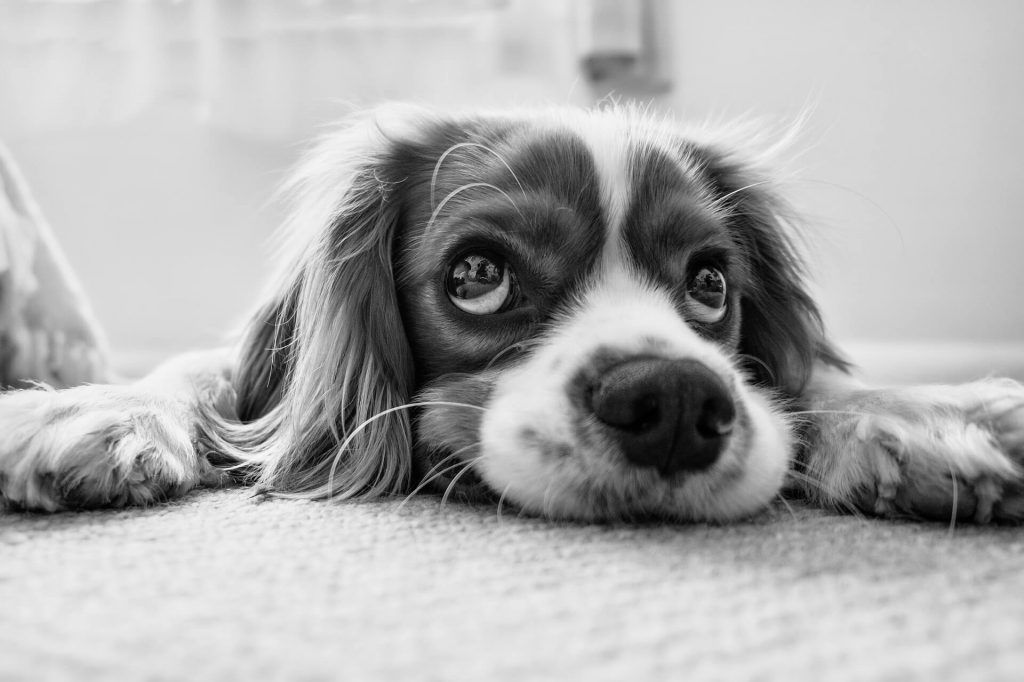

In [144]:
#your_img_name = Image.open(Path().resolve().parent / "images" / "Perrote.jpg").convert('L')
your_img = Image.open(Path().resolve().parent / "images" / "Perrote.jpg" ).convert('L')
your_img

In [145]:
your_img_np =  np.array(your_img) 
your_img_np.shape

(682, 1024)

 el error de aproximación por la norma de Frobenius es 13496.3291015625.


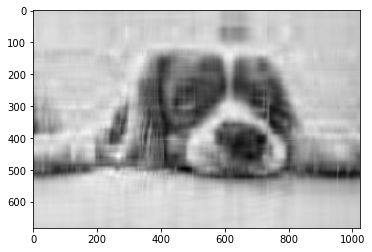

In [146]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

 el error de aproximación por la norma de Frobenius es 3740.03564453125.


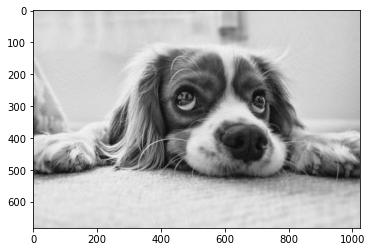

In [147]:
your_img50 = low_rank_svd_approximation(your_img_np, l=100)
plt.imshow(your_img50, cmap='gray');

 ℓ(ε) o el mayor rango aproximado de A es 11 con una tolerancia relativa ε de 0.0822. El incremento de rango para el ciclo for es de 5 en 5.


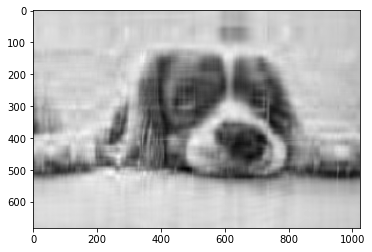

In [148]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

 ℓ(ε) o el mayor rango aproximado de A es 226 con una tolerancia relativa ε de 0.0099. El incremento de rango para el ciclo for es de 5 en 5.


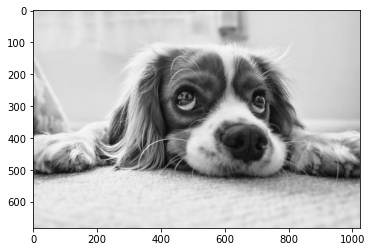

In [149]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Esta es una forma de comprimir, pero por lo que investigue la libreria PIL de Python es una mejor forma de comprimir imagenes.
Pil/Pillow es una librería gratuita que permite la edición de imágenes directamente desde Python. Soporta una variedad de formatos, incluídos los más utilizados como GIF, JPEG y PNG. Una gran parte del código está escrito en C, por cuestiones de rendimiento.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [197]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [198]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .dropna(subset=['codigo_comuna']) 
    .drop(['codigo_region','codigo_comuna','tasa'], axis=1) 
    .melt(id_vars=['region','comuna','poblacion'],var_name='fecha',value_name='casos_totales')
    .fillna({'casos_totales': 0})
)
covid_comunas['fecha'] = pd.to_datetime(covid_comunas['fecha'],format="%Y/%m/%d")
covid_comunas 

,region,comuna,poblacion,fecha,casos_totales
0,Arica y Parinacota,Arica,247552.0,2020-03-30,6.0
1,Arica y Parinacota,Camarones,1233.0,2020-03-30,0.0
2,Arica y Parinacota,General Lagos,810.0,2020-03-30,0.0
3,Arica y Parinacota,Putre,2515.0,2020-03-30,0.0
4,Tarapacá,Alto Hospicio,129999.0,2020-03-30,0.0
...,...,...,...,...,...
22139,Magallanes,Punta Arenas,141984.0,2020-10-30,10996.0
22140,Magallanes,Rio Verde,211.0,2020-10-30,2.0
22141,Magallanes,San Gregorio,681.0,2020-10-30,20.0
22142,Magallanes,Timaukel,282.0,2020-10-30,21.0


In [199]:
filtro_fechas=covid_comunas['fecha'].between('2020-10-01','2020-10-11')
covid_comunas=covid_comunas[filtro_fechas]
covid_comunas

,region,comuna,poblacion,fecha,casos_totales
19030,Arica y Parinacota,Arica,247552.0,2020-10-02,8597.0
19031,Arica y Parinacota,Camarones,1233.0,2020-10-02,27.0
19032,Arica y Parinacota,General Lagos,810.0,2020-10-02,64.0
19033,Arica y Parinacota,Putre,2515.0,2020-10-02,67.0
19034,Tarapacá,Alto Hospicio,129999.0,2020-10-02,3824.0
...,...,...,...,...,...
20063,Magallanes,Punta Arenas,141984.0,2020-10-09,9431.0
20064,Magallanes,Rio Verde,211.0,2020-10-09,2.0
20065,Magallanes,San Gregorio,681.0,2020-10-09,14.0
20066,Magallanes,Timaukel,282.0,2020-10-09,12.0


In [200]:
covid_comunas1=covid_comunas.groupby(["comuna", "fecha"]).agg(
       casos_totales=("casos_totales", lambda x: x ))
    
covid_comunas2=covid_comunas1.assign(casos_nuevos=lambda df: df.groupby("comuna")["casos_totales"].transform(lambda s: s.diff() )
)
covid_comunas2.head()

casos_totales  casos_nuevos
comuna    fecha                                  
Algarrobo 2020-10-02          156.0           NaN
          2020-10-05          166.0          10.0
          2020-10-09          169.0           3.0
Alhue     2020-10-02          362.0           NaN
          2020-10-05          365.0           3.0

In [201]:
covid_comunas3=covid_comunas2.assign(
    promedio_casos_nuevos=lambda df: df.groupby("comuna")["casos_nuevos"].transform(lambda s: s.mean())
)
covid_comunas4=covid_comunas3.groupby("comuna").agg(promedio_casos_nuevos=("promedio_casos_nuevos", "mean"))
covid_comunas4

,promedio_casos_nuevos
comuna,
Algarrobo,6.5
Alhue,3.0
Alto Biobio,1.0
Alto Hospicio,46.5
Alto del Carmen,0.5
...,...
Vitacura,15.5
Yerbas Buenas,1.0
Yumbel,16.5


In [202]:
covid_comunas5=covid_comunas4.merge(
        covid_comunas,
        how="inner",
        on="comuna"
    )
covid_comunas5

,comuna,promedio_casos_nuevos,region,poblacion,fecha,casos_totales
0,Algarrobo,6.5,Valparaíso,15174.0,2020-10-02,156.0
1,Algarrobo,6.5,Valparaíso,15174.0,2020-10-05,166.0
2,Algarrobo,6.5,Valparaíso,15174.0,2020-10-09,169.0
3,Alhue,3.0,Metropolitana,7405.0,2020-10-02,362.0
4,Alhue,3.0,Metropolitana,7405.0,2020-10-05,365.0
...,...,...,...,...,...,...
1033,Yungay,2.5,Ñuble,18596.0,2020-10-05,198.0
1034,Yungay,2.5,Ñuble,18596.0,2020-10-09,199.0
1035,Zapallar,0.0,Valparaíso,7994.0,2020-10-02,143.0
1036,Zapallar,0.0,Valparaíso,7994.0,2020-10-05,143.0


In [203]:
covid_comunas6=covid_comunas5.groupby(["region", "comuna"]).apply(lambda df: df["promedio_casos_nuevos"].mean()/df["poblacion"].mean()*100000).sort_values()
#covid_comunas3.query("comuna == 'La Estrella'")
covid_comunas6.tail(10)

region      comuna              
Tarapacá    Camina                   181.818182
Los Lagos   Rio Negro                189.141856
Magallanes  Laguna Blanca            189.393939
            Rio Verde                236.966825
Los Lagos   San Juan de la Costa     274.905092
Magallanes  Natales                  336.388866
            San Gregorio             367.107195
            Punta Arenas             454.980843
            Porvenir                 621.330056
            Timaukel                1773.049645
dtype: float64

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__  Se puede observar que de las 8 comunas con mas casos nuevos promedio por cada 100.000 habitantes, 7 son de la región de Magallanes. 
                La comuna mas critica es Timaukel. Por lo que es verdad que en el rango de fechas estudiado, Magallanes esta en una situación crítica.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [204]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,728,794,738,737,832,542,343,706,777,1058
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,648,972,932,1046,1044,796,714,694,946,1752
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1229,1571,1890,2239,3825,1749,1354,1858,1238,1906
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,319,792,838,1020,939,563,340,237,838,863
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,823,1008,1128,1057,1026,473,1503,1050,1125,1351


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [205]:
covid_pcr_melt = pd.melt(covid_pcr.drop(['codigo_region', 'poblacion'], axis=1)                          #drop('codigo_region',axis=1).drop('poblacion',axis=1)
                  , id_vars = 'region'
                  , var_name = 'fecha'
                  , value_name = 'nm_pcr'
                 ).fillna(0)
covid_pcr_melt['fecha'] = pd.to_datetime(covid_pcr_melt['fecha'],format="%Y/%m/%d")
covid_pcr_melt.tail()#.dtypes

,region,fecha,nm_pcr
3291,Araucanía,2020-10-31,1716.0
3292,Los Ríos,2020-10-31,1012.0
3293,Los Lagos,2020-10-31,3670.0
3294,Aysén,2020-10-31,235.0
3295,Magallanes,2020-10-31,707.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [206]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_casos_melt = pd.melt(covid_comunas.drop(['codigo_region','comuna','codigo_comuna','poblacion','tasa'], axis=1)
                  , id_vars = 'region'
                  , var_name = 'fecha'
                  , value_name = 'casos_totales'
                 ).fillna(0)
covid_casos_melt['fecha'] = pd.to_datetime(covid_casos_melt['fecha'],format="%Y/%m/%d")
covid_casos_melt#dtypes

,region,fecha,casos_totales
0,Arica y Parinacota,2020-03-30,6.0
1,Arica y Parinacota,2020-03-30,0.0
2,Arica y Parinacota,2020-03-30,0.0
3,Arica y Parinacota,2020-03-30,0.0
4,Arica y Parinacota,2020-03-30,0.0
...,...,...,...
23163,Magallanes,2020-10-30,2.0
23164,Magallanes,2020-10-30,20.0
23165,Magallanes,2020-10-30,21.0
23166,Magallanes,2020-10-30,2.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [207]:
covid_corr_casos_pcr = (
    covid_pcr_melt.merge(covid_casos_melt, on=(['fecha','region']), how='outer')
)
covid_corr_casos_pcr['nm_pcr'] = covid_corr_casos_pcr['nm_pcr'].fillna(0)
covid_corr_casos_pcr['casos_totales'] = covid_corr_casos_pcr['casos_totales'].fillna(0)
covid_corr_casos_pcr['casos_totales'] = covid_corr_casos_pcr['casos_totales'].ffill()#.bfill()
covid_corr_casos_pcr.head(10)

,region,fecha,nm_pcr,casos_totales
0,Arica y Parinacota,2020-04-09,70.0,0.0
1,Tarapacá,2020-04-09,0.0,0.0
2,Antofagasta,2020-04-09,182.0,0.0
3,Atacama,2020-04-09,57.0,0.0
4,Coquimbo,2020-04-09,0.0,0.0
5,Valparaíso,2020-04-09,301.0,0.0
6,Metropolitana,2020-04-09,5383.0,0.0
7,O’Higgins,2020-04-09,68.0,0.0
8,Maule,2020-04-09,397.0,0.0
9,Ñuble,2020-04-09,364.0,0.0


In [208]:
covid_corr_casos_pcr.groupby("region").apply(
        lambda df: df["casos_totales"].sum() / df["nm_pcr"].sum()).sort_values()

region
Los Lagos             0.084160
Aysén                 0.118058
Araucanía             0.157231
Biobío                0.174202
Los Ríos              0.206740
Maule                 0.230254
Valparaíso            0.297248
Ñuble                 0.335399
O’Higgins             0.366696
Metropolitana         0.382981
Coquimbo              0.572323
Atacama               0.579667
Magallanes            0.665981
Antofagasta           0.941794
Tarapacá              1.297770
Arica y Parinacota    1.437412
dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Que según este analisis no hay correlación entre el numero de PCR realizados y casos confirmados. Incluso en la región de Tarapacá y Arica y Parinacota la correlación
indica un numero mayor de casos que de PCR realizados por lo que no se condidec con mi sentido común. Quizas en estas regiones paso que no estan correctamente contabilizados los
PCR o se uso otro método para determinar los casos confirmados, esto habría que estudiarlo.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Cual es el porcentaje por región de casos confirmados de COVID-19 que ingresa a la UCI de un hospital o clínica al 30 de octubre del 2020?
¿Cual es la región que mas pacientes se agravan por COVID-19?

In [209]:
#Extraemos los datos del Ministerio de Ciencia, Tecnología e Innovación de Chile para los casos confirmados al 30-10-2020.
covid_casos_conf = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/2020-10-30-CasosConfirmados.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .drop(['codigo_region', 'comuna','codigo_comuna','poblacion'], axis=1)    #Elimino columnas que no me sirven
    .groupby("region").agg(casos_confirmados_sum=("casos_confirmados", "sum"))  #Agrupo por región y agrego una columna de suma de casos confirmados por región
)
covid_casos_conf.head()

,casos_confirmados_sum
region,
Antofagasta,22426.0
Araucanía,12540.0
Arica y Parinacota,10088.0
Atacama,7941.0
Aysén,1105.0


In [210]:
#Extraemos los datos del Ministerio de Ciencia, Tecnología e Innovación de Chile para los casos UCI a la fecha actual 31-10-2020.
covid_uci = (pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_std.csv")
      .rename(columns=lambda x: x.lower().replace(" ", "_")))

covid_uci['fecha'] = pd.to_datetime(covid_uci['fecha'],format="%Y/%m/%d")
filtro_c_u = covid_uci['fecha'] <='2020-10-30'                                 #Filtro por la misma fecha de la dataframe del archivo casos confirmados para compararlos
covid_uci_1=covid_uci[filtro_c_u]
covid_uci_1.tail()

,region,codigo_region,poblacion,fecha,numero
3403,Araucanía,9,1014343,2020-10-30,45
3404,Los Ríos,14,405835,2020-10-30,7
3405,Los Lagos,10,891440,2020-10-30,30
3406,Aysén,11,107297,2020-10-30,3
3407,Magallanes,12,178362,2020-10-30,12


In [211]:
covid_uci_2 = (covid_uci_1.drop(['codigo_region','poblacion'], axis=1)
      .rename(columns={'numero': 'casos_uci'}, inplace = False)
      .groupby(["region"]).agg(casos_uci_sum=("casos_uci", "sum"))    #Agrupo por región y agrego una columna de suma de casos UCI por región
)
covid_uci_2.head()

,casos_uci_sum
region,
Antofagasta,10517
Araucanía,4143
Arica y Parinacota,2995
Atacama,1152
Aysén,226


In [212]:
covid_cconf_uci = (
    covid_uci_2.merge(covid_casos_conf, on='region', how='outer')   #junto ambos archivos  
)
covid_cconf_uci.head()

,casos_uci_sum,casos_confirmados_sum
region,,
Antofagasta,10517,22426.0
Araucanía,4143,12540.0
Arica y Parinacota,2995,10088.0
Atacama,1152,7941.0
Aysén,226,1105.0


In [213]:
covid_cconf_uci.groupby("region").apply(
    lambda df: df["casos_uci_sum"] / df["casos_confirmados_sum"]*100).sort_values()     #Aplico una nueva columna y determino el porcentaje de casos confirmados que van a una UCI

region              region            
Atacama             Atacama               14.506989
Magallanes          Magallanes            16.285953
Aysén               Aysén                 20.452489
Los Ríos            Los Ríos              22.537563
Tarapacá            Tarapacá              25.893413
Ñuble               Ñuble                 26.143658
Los Lagos           Los Lagos             27.997941
Arica y Parinacota  Arica y Parinacota    29.688739
Araucanía           Araucanía             33.038278
Coquimbo            Coquimbo              34.038069
Maule               Maule                 35.306371
Biobío              Biobío                38.104992
O’Higgins           O’Higgins             38.762566
Valparaíso          Valparaíso            39.715171
Metropolitana       Metropolitana         45.312571
Antofagasta         Antofagasta           46.896459
dtype: float64

__Respuesta:__   Como se puede observar hay una variación importante de casos confirmados que ingresan a una UCI donde el porcentaje menor esta en la region de Atacama.

Según estos datos la región con mas pacientes que se agravan e ingresan a una UCI es la de Antofagasta con un 46.9% por lo que sería importante estudiar por que ocurre esto.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ ¿Cual es la tasa de letalidad por COVID-19 para las comunas de la región de Valparaíso? Compare con la tasa de letalidad Nacional que a la fecha es de 2.78%.

In [214]:
#Extraemos los datos del Ministerio de Ciencia, Tecnología e Innovación para los casos confirmados por comuna a la fecha del 30-10-2020. No es el mismo dataset de la pregunta 8
covid_casos_comuna = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto2/2020-10-30-CasosConfirmados.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .drop(['codigo_region','codigo_comuna','poblacion'], axis=1)             #Elimino columnas que no me sirven
    .groupby(["region", "comuna"]).agg(casos_confirmados_sum=("casos_confirmados", "sum")) #Agrupo por región y comuna y agrego una columna de suma de casos confirmados por comuna
)
covid_casos_comuna

casos_confirmados_sum
region      comuna                                        
Antofagasta Antofagasta                            12211.0
            Calama                                  7806.0
            Desconocido Antofagasta                  314.0
            Maria Elena                              359.0
            Mejillones                               660.0
...                                                    ...
Ñuble       San Fabian                                43.0
            San Ignacio                              227.0
            San Nicolas                              216.0
            Treguaco                                  85.0
            Yungay                                   205.0

[362 rows x 1 columns]

In [215]:
#Extraemos los datos del Ministerio de Ciencia, Tecnología e Innovación para los casos confirmados por comuna a la fecha actual (31-10-2020)
covid_fall_com = (pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto61/serie_fallecidos_comuna.csv")
      .rename(columns=lambda x: x.lower().replace(" ", "_"))).drop(['cie_10'], axis=1)

covid_fall_com_1= (pd.melt(covid_fall_com
                  , id_vars = ['region','comuna']
                  , var_name = 'fecha'
                  , value_name = 'fallecidos_comuna'
                  ).fillna(0))
covid_fall_com_1['fecha'] = pd.to_datetime(covid_fall_com_1['fecha'],format="%Y/%m/%d")
filtro_fecha = covid_fall_com_1['fecha'] <='2020-10-30'    #Filtro por la misma fecha de la dataframe del archivo casos confirmados para compararlos
covid_fall_com_2=covid_fall_com_1[filtro_fecha]
covid_fall_com_2.tail()

,region,comuna,fecha,fallecidos_comuna
10939,Aysén,Río Ibáñez,2020-10-30,1.0
10940,Maule,San Rafael,2020-10-30,1.0
10941,Aysén,Guaitecas,2020-10-30,1.0
10942,Aysén,Río Ibáñez,2020-10-30,0.0
10943,Maule,San Rafael,2020-10-30,0.0


In [216]:
covid_fall_com_2_1=covid_fall_com_2.drop(covid_fall_com_2[covid_fall_com_2['region']==0].index)
covid_fall_com_3=covid_fall_com_2_1.groupby(["region", "comuna"]).agg(fallecidos_comuna_sum=("fallecidos_comuna", "max"))   #Agrupo por región y comuna
covid_fall_com_3

fallecidos_comuna_sum
region      comuna                            
Antofagasta Antofagasta                  242.0
            Calama                       249.0
            Maria Elena                   10.0
            Mejillones                     5.0
            Ollagüe                        0.0
...                                        ...
Ñuble       San Ignacio                    8.0
            San Nicolás                    6.0
            Treguaco                       2.0
            Yungay                         4.0
            Ñiquén                         4.0

[346 rows x 1 columns]

In [217]:
covid_conf_fall_valpo = (
    covid_casos_comuna.merge(covid_fall_com_3, on=['region','comuna'], how='inner').query("region == 'Valparaíso'")   #Junto los dos dataframe y filtro por la región de Valparaíso
)
covid_conf_fall_valpo

casos_confirmados_sum  fallecidos_comuna_sum
region     comuna                                                      
Valparaíso Algarrobo                       187.0                    9.0
           Cabildo                         498.0                   19.0
           Calera                         1547.0                   56.0
           Calle Larga                     381.0                    6.0
           Cartagena                       350.0                    7.0
           Casablanca                      563.0                    9.0
           Catemu                          364.0                    8.0
           Concon                          818.0                   21.0
           El Quisco                       339.0                    7.0
           El Tabo                         319.0                    8.0
           Hijuelas                        382.0                   12.0
           Isla de Pascua                    9.0                    0.0
           La Cruz                         445.0                    7.0
           La Ligua                        984.0                   32.0
           Limache                        1294.0                   37.0
           Llaillay                        618.0                   11.0
           Los Andes                      1436.0                   46.0
           Nogales                         513.0                   14.0
           Panquehue                       133.0                    3.0
           Papudo                          201.0                    4.0
           Petorca                         185.0                    4.0
           Putaendo                        336.0                   12.0
           Quillota                       2527.0                   66.0
           Quilpue                        3252.0                   76.0
           Quintero                        647.0                   16.0
           Rinconada                       197.0                    6.0
           San Antonio                    1866.0                   49.0
           San Esteban                     351.0                    9.0
           San Felipe                     1791.0                   44.0
           Santa Maria                     358.0                    5.0
           Santo Domingo                   210.0                    2.0
           Valparaiso                     7960.0                  181.0
           Villa Alemana                  3083.0                   61.0
           Zapallar                        149.0                    3.0

In [218]:
#Determino el porcentaje de fallecidos por comuna para la región de Valparaiso
covid_conf_fall_valpo_f=covid_conf_fall_valpo.groupby(["comuna"]).apply(
    lambda df: df["fallecidos_comuna_sum"] / df["casos_confirmados_sum"]*100).sort_values()  
covid_conf_fall_valpo_f

comuna          region      comuna        
Isla de Pascua  Valparaíso  Isla de Pascua    0.000000
Santo Domingo   Valparaíso  Santo Domingo     0.952381
Santa Maria     Valparaíso  Santa Maria       1.396648
La Cruz         Valparaíso  La Cruz           1.573034
Calle Larga     Valparaíso  Calle Larga       1.574803
Casablanca      Valparaíso  Casablanca        1.598579
Llaillay        Valparaíso  Llaillay          1.779935
Villa Alemana   Valparaíso  Villa Alemana     1.978592
Papudo          Valparaíso  Papudo            1.990050
Cartagena       Valparaíso  Cartagena         2.000000
Zapallar        Valparaíso  Zapallar          2.013423
El Quisco       Valparaíso  El Quisco         2.064897
Petorca         Valparaíso  Petorca           2.162162
Catemu          Valparaíso  Catemu            2.197802
Panquehue       Valparaíso  Panquehue         2.255639
Valparaiso      Valparaíso  Valparaiso        2.273869
Quilpue         Valparaíso  Quilpue           2.337023
San Felipe      Valpar

__Respuesta:__

Como se puede observar la tasa de letalidad varia desde 0% para la comuna de Isla de Pascua hasta un 4.8% para la comuna de Algarrobo. Si comparamos con la tasa de letalidad a la fecha para Chile que es de 2.78%, la mayoria de las comunas de la región estan bajo esta tasa que son 25 comunas, las que estan sobre esta tasas son 9 comunas. La comuna de Valparaíso que es la que tiene mas habitantes de la región, tiene un 2.27% de la tasa de letalidad que es menor a la nacional que a la fecha tiene 2.78%.